 ![](unnamed.png)

# The SPARKS FOUNDATION

# Task-4:Exploratory Data Analysis - Terrorism

Author:A.SAI GANESH

As a security/defense analyst, try to find out the hot zone of terrorism.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Getting top 5 rows from the data set

In [53]:
e=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")
e.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Altering the Column Names

In [54]:
e.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
e['Casualities'] = e.Killed + e.Wounded
e=e[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

e.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


# Getting Total Number of Null values from each Row

In [55]:
e.isnull().sum() 

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

# Getting Info from dataset

In [56]:
print(f"""
    There are {e.Country.nunique()} countries from {e.Region.nunique()} regions in the dataset and terrorist attacks data in {e.Year.nunique()}
    years from {e.Year.min()} to {e.Year.max()}. {e.index.nunique()} terrorist attacks had been recorded here which caused about {int(e.Casualities.sum())} casualities
    consisting of {int(e.Killed.sum())} kills and {int(e.Wounded.sum())} wounded.
""")


    There are 205 countries from 12 regions in the dataset and terrorist attacks data in 47
    years from 1970 to 2017. 181691 terrorist attacks had been recorded here which caused about 872892 casualities
    consisting of 411868 kills and 523869 wounded.



# Top 5 most terrorist witnessed countries

In [57]:

print(f"The highest terrorist attacks were commited in {e.Country.value_counts().index[0]} with {e.Country.value_counts().max()} attacks")

print('The other 4 countries with highest terrorist attacks are:')
for i in range(1,5):
    print(f"{i+1}. {e.Country.value_counts().index[i]} with {e.Country.value_counts()[i]} attacks")

The highest terrorist attacks were commited in Iraq with 24636 attacks
The other 4 countries with highest terrorist attacks are:
2. Pakistan with 14368 attacks
3. Afghanistan with 12731 attacks
4. India with 11960 attacks
5. Colombia with 8306 attacks


# Top 5 most terrorist witnessed places by Region wise

In [58]:
print(f"The region that highest terrorist attacks were commited in {e.Region.value_counts().index[0]} with {e.Region.value_counts().max()} attacks")

print('The other regions orderd by highest terrorist attacks are:')
for i in range(1,5):
    print(f"{i+1}. {e.Region.value_counts().index[i]} with {e.Region.value_counts()[i]} attacks")

The region that highest terrorist attacks were commited in Middle East & North Africa with 50474 attacks
The other regions orderd by highest terrorist attacks are:
2. South Asia with 44974 attacks
3. South America with 18978 attacks
4. Sub-Saharan Africa with 17550 attacks
5. Western Europe with 16639 attacks


# Plotting Year wise Terrorist Activites

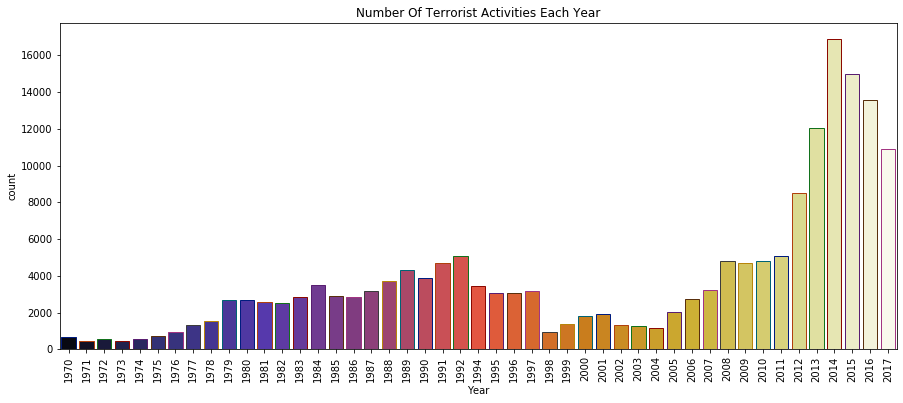

In [59]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=e,palette='CMRmap',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

# Plotting Year Wise Casualities From Attacks

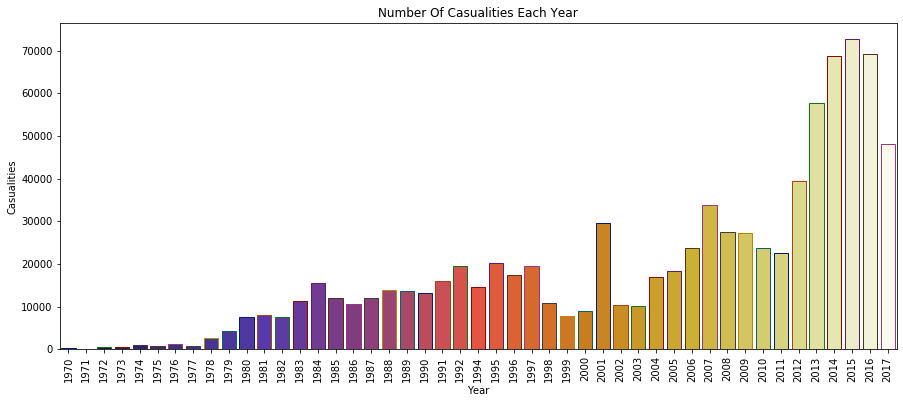

In [60]:
plt.subplots(figsize=(15,6))
year_cas = e.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='CMRmap',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

# Plotting Country Wise Terrorist Activites

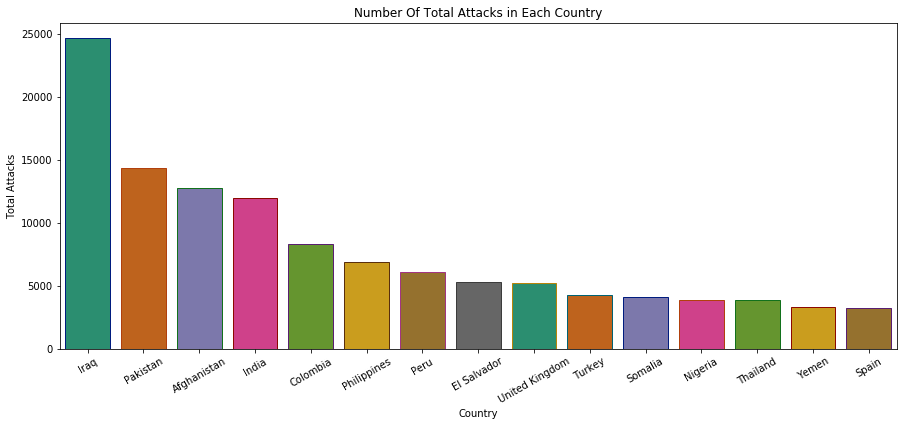

In [61]:
plt.subplots(figsize=(15,6))
country_attacks = e.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'Dark2',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Attacks in Each Country')
plt.show()

# Plotting Country Wise Casualities From Terrorsit Activities

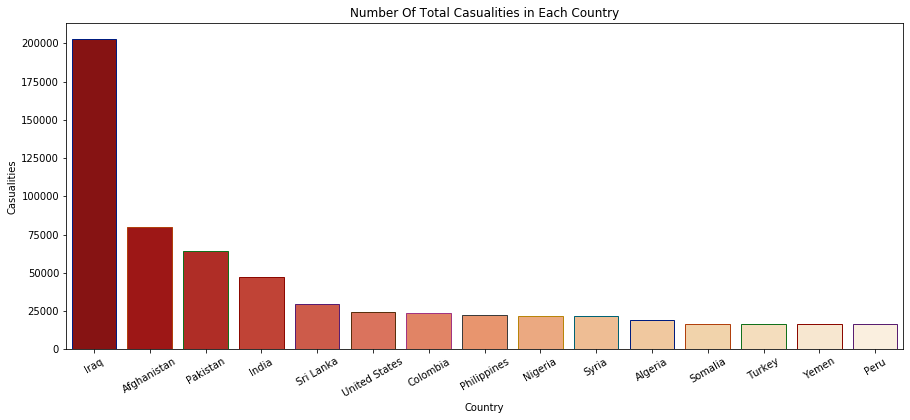

In [62]:
plt.subplots(figsize=(15,6))
count_cas = e.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Casualities in Each Country')
plt.show()

# Plotting Region Wise Terrorist Activites

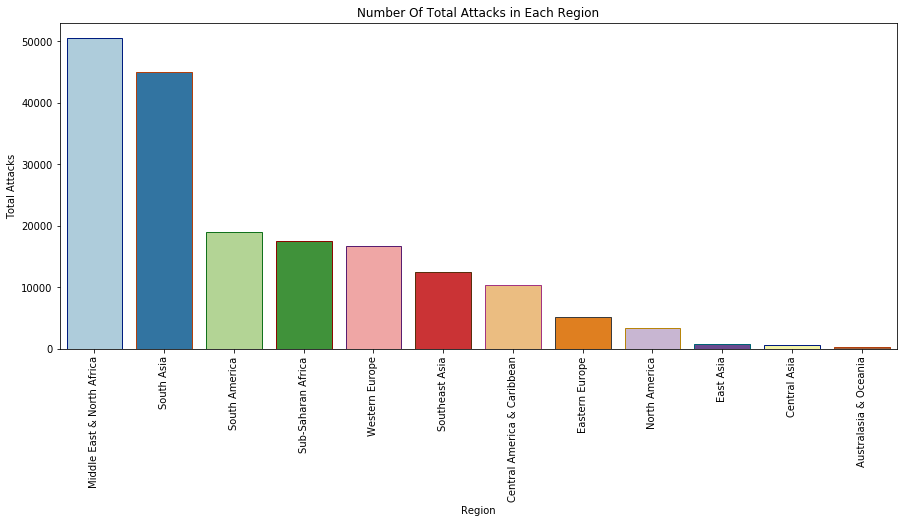

In [63]:
region_attacks = e.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='Paired', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Region')
plt.show()

# Plotting Terrorist Activites Types

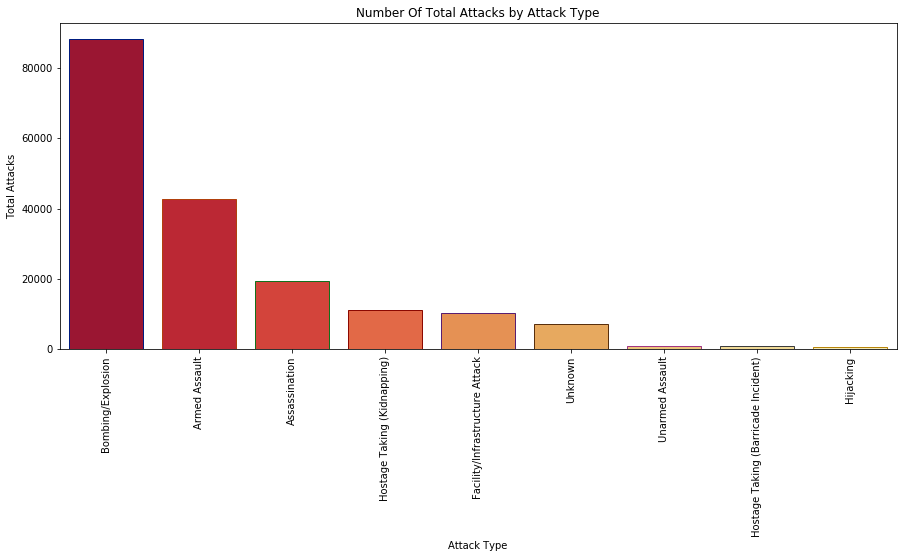

In [64]:
attack_type = e.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='YlOrRd_r',
            edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks by Attack Type')
plt.show()

# Terrorist Gropus which Attack in Most Numbers

In [65]:
group_attacks = e.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks

,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


# Plotting Terrorist Activity Groups Which Attack Most

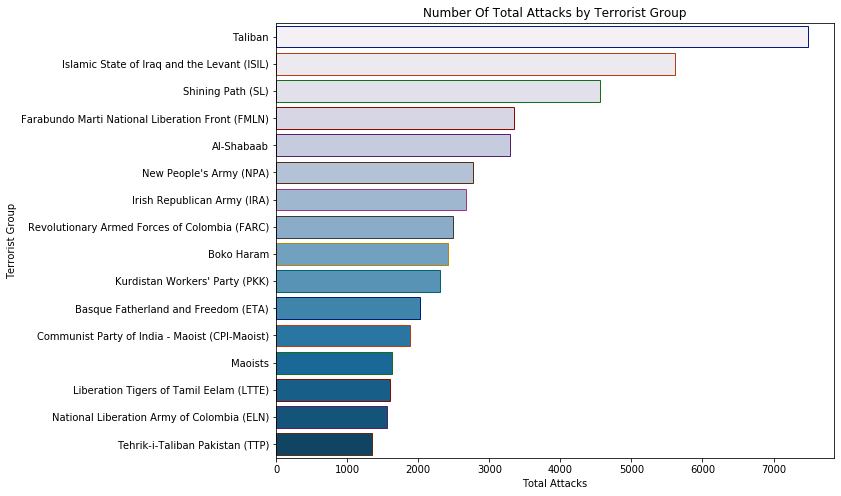

In [66]:
group_attacks = e.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='PuBu',
            edgecolor=sns.color_palette('dark', 10))
# plt.xticks()
plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

# Comparing Each Terrorist Groups Side by Side 

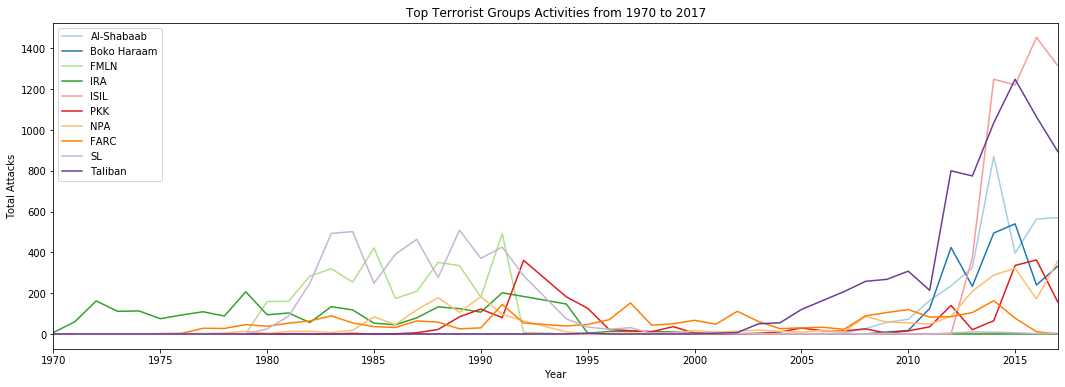

In [67]:
groups_10 = e[e.Group.isin(e.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()

In [68]:
def change_case(text):
    text = text.lower()
    return text[0].upper()+text[1:]
iran_attacks = e[e.Country=='Iran'].reset_index()
iran_attacks.City = iran_attacks.City.apply(change_case)
iran_attacks.head()

,index,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,334,1970,6,9,Iran,Middle East & North Africa,Tehran,35.724533,51.40519,Bombing/Explosion,NaN,NaN,NaN,EL AL Office,Popular Front for the Liberation of Palestine ...,Airports & Aircraft,Explosives
1,342,1970,6,11,Iran,Middle East & North Africa,Tehran,35.724533,51.40519,Bombing/Explosion,NaN,NaN,NaN,EL AL Office,Unknown,Airports & Aircraft,Explosives
2,529,1970,10,0,Iran,Middle East & North Africa,Tehran,35.724533,51.40519,Armed Assault,NaN,NaN,NaN,Bank,Siah KAL,Business,Firearms
3,549,1970,10,10,Iran,Middle East & North Africa,Tehran,35.724533,51.40519,Hijacking,0.0,1.0,1.0,B-727,Iranians,Airports & Aircraft,Unknown
4,584,1970,11,0,Iran,Middle East & North Africa,Tehran,35.724533,51.40519,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Mc Arthur, U.S. Ambassador",Unknown,Government (Diplomatic),Unknown


# IRAN's Numbers 

In [69]:
print(f"""
    A total number of {iran_attacks.City.nunique()} cities attacked by {iran_attacks.Group.nunique()} different terrorist groups covered in the dataset between
    {iran_attacks.Year.min()} to {iran_attacks.Year.max()}. Overally {iran_attacks.index.nunique()} terrorist attacks are recorded here which caused about {int(iran_attacks.Casualities.sum())} casualities
    consisted of {int(iran_attacks.Killed.sum())} kills and {int(iran_attacks.Wounded.sum())} wounded.
""")


    A total number of 119 cities attacked by 73 different terrorist groups covered in the dataset between
    1970 to 2017. Overally 684 terrorist attacks are recorded here which caused about 5623 casualities
    consisted of 1673 kills and 4029 wounded.



# Most Effected Cities in Iran

In [70]:
print(f"The highest terrorist attacks were commited in {iran_attacks.City.value_counts().index[0]} with {iran_attacks.City.value_counts().max()} attacks")

print('The other 4 Iranian cities with highest terrorist attacks are:')
for i in range(2,6):
    print(f"{i}. {iran_attacks.City.value_counts().index[i]} with {iran_attacks.City.value_counts()[i]} attacks")

The highest terrorist attacks were commited in Tehran with 282 attacks
The other 4 Iranian cities with highest terrorist attacks are:
2. Ahvaz with 33 attacks
3. Khorramshahr with 29 attacks
4. Mashhad with 21 attacks
5. Zahedan with 20 attacks


# No.of Terror Attacks per Year in Iran

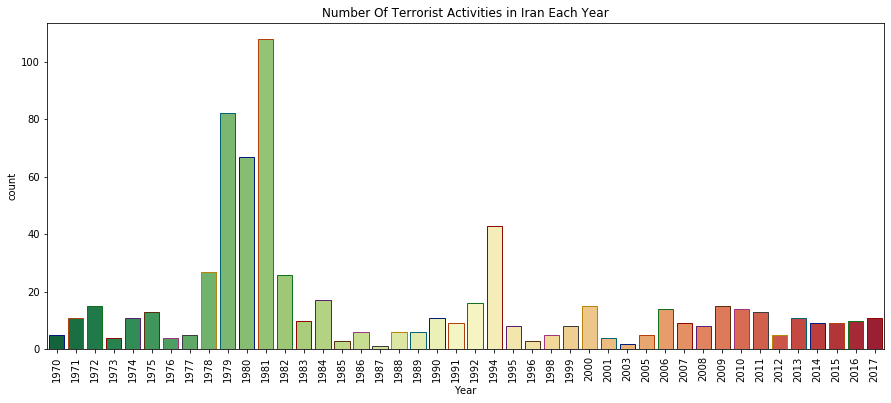

In [71]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=iran_attacks,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in Iran Each Year')
plt.show()

# Plotting Most Effeted cities in Iran

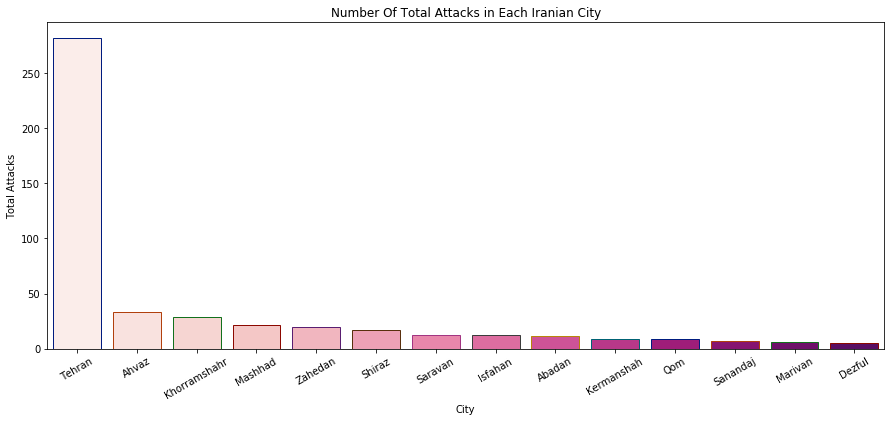

In [72]:

plt.subplots(figsize=(15,6))
city_attacks_iran = iran_attacks.City.value_counts()[:15].reset_index()
city_attacks_iran.columns = ['City', 'Total Attacks']
city_attacks_iran.drop(1, inplace=True)
sns.barplot(x=city_attacks_iran.City, y=city_attacks_iran['Total Attacks'], palette='RdPu',
            edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Attacks in Each Iranian City')
plt.show()

# Types Of Terror Attacks In Iran

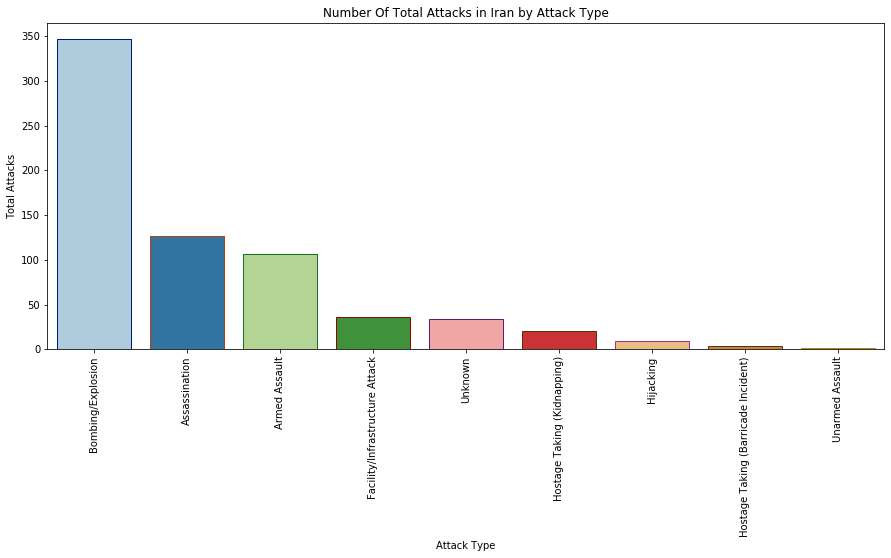

In [73]:
ir_attack_type = iran_attacks.AttackType.value_counts().to_frame().reset_index()
ir_attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=ir_attack_type['Attack Type'], y=ir_attack_type['Total Attacks'], palette='Paired',
            edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Iran by Attack Type')
plt.show()

# Terrorist Groups Which Attack Iran the Most

In [74]:
ir_group_attacks = iran_attacks.Group.value_counts().to_frame().drop('Unknown').reset_index()[:8]
ir_group_attacks.columns = ['Terrorist Group', 'Total Attacks']
ir_group_attacks

,Terrorist Group,Total Attacks
0,Mujahedin-e Khalq (MEK),98
1,Arab Separatists,23
2,Forqan Group,18
3,Counter-revolutionaries,15
4,Kurdistan Free Life Party,14
5,Jaish al-Adl,14
6,Jundallah (Iran),13
7,Armenian Secret Army for the Liberation of Arm...,12


# Plotting The Terrorist Groups Which Attack Iran the Most

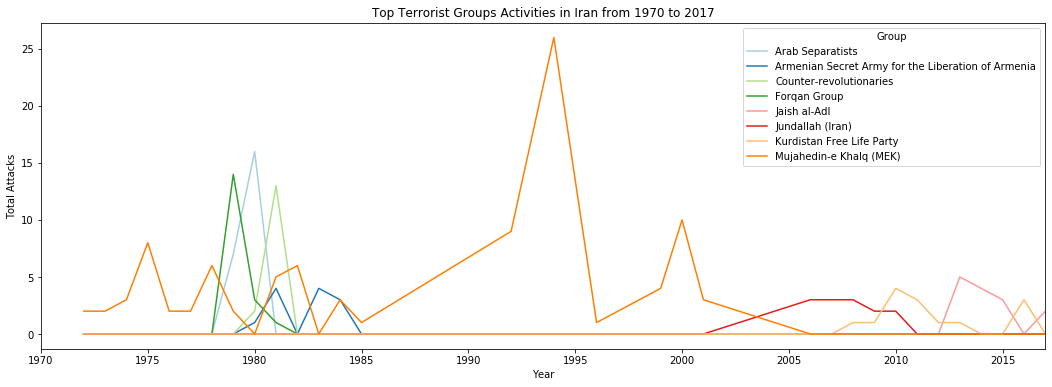

In [75]:
ir_groups_10 = iran_attacks[iran_attacks.Group.isin(iran_attacks.Group.value_counts()[1:9].index)]
pd.crosstab(ir_groups_10.Year, ir_groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities in Iran from 1970 to 2017')
plt.show()

In [76]:
e.fillna(0)


,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,3.0,Checkpoint,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,9.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,0.0,Office,Unknown,Government (General),Explosives


In [77]:
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")


# Most Effected provisional states by Terrorist Attacks Over the Globe

In [78]:

b=df["provstate"].value_counts()

# Top 5 provisional states Witnessed terrorism Activites

In [79]:
b.head(5)


Baghdad             7645
Northern Ireland    4498
Unknown             4290
Balochistan         3710
Saladin             3411
Name: provstate, dtype: int64

In [80]:
print(f"The highest number of attacks from the entire data set in a particular provisional state is {df.provstate.value_counts().index[0]} with {b.max()} attacks")

The highest number of attacks from the entire data set in a particular provisional state is Baghdad with 7645 attacks
